# Usage example for lmdiag
Source: https://github.com/dynobo/lmdiag

### Imports and configure plot style

In [1]:
import lmdiag
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from sklearn.linear_model import LinearRegression

plt.style.use("seaborn-v0_8")

%matplotlib inline

### Generate some sample data

In [2]:
np.random.seed(20)
X = np.random.normal(size=30, loc=20, scale=3)
y = 5 + 5 * X + np.random.normal(size=30)
X = sm.add_constant(X)  # Add column of 1s for intercept

### Print all plots as facet/trellis plot

**Using `statsmodels`:**

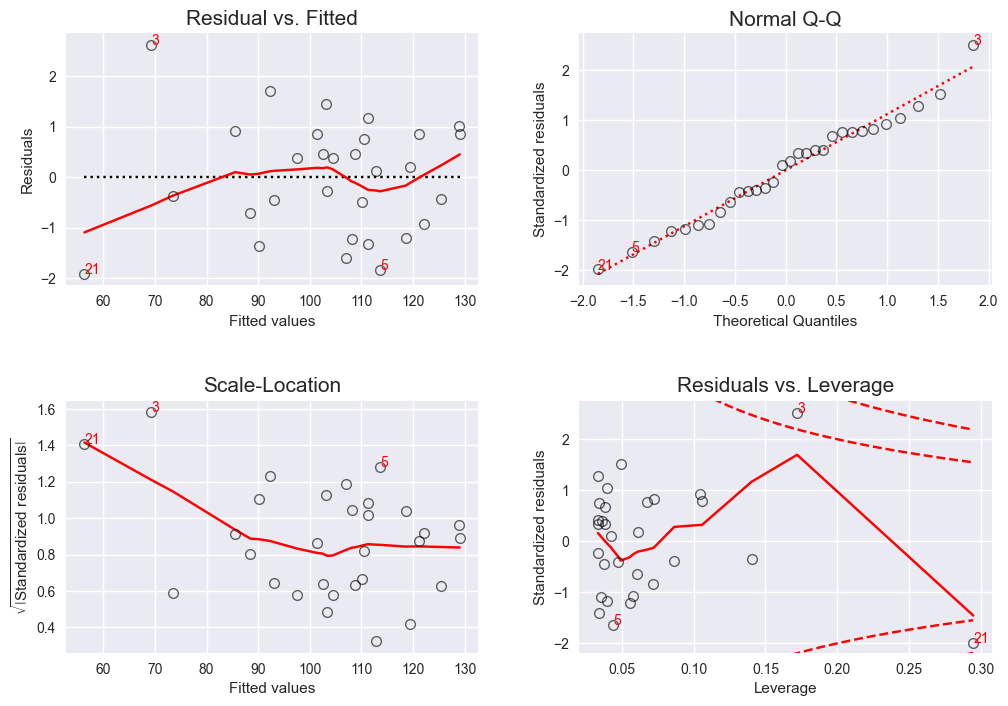

In [3]:
statsmodels_lm = sm.OLS(y, X).fit()
lmdiag.plot(statsmodels_lm);

**Using `linearmodels`:**

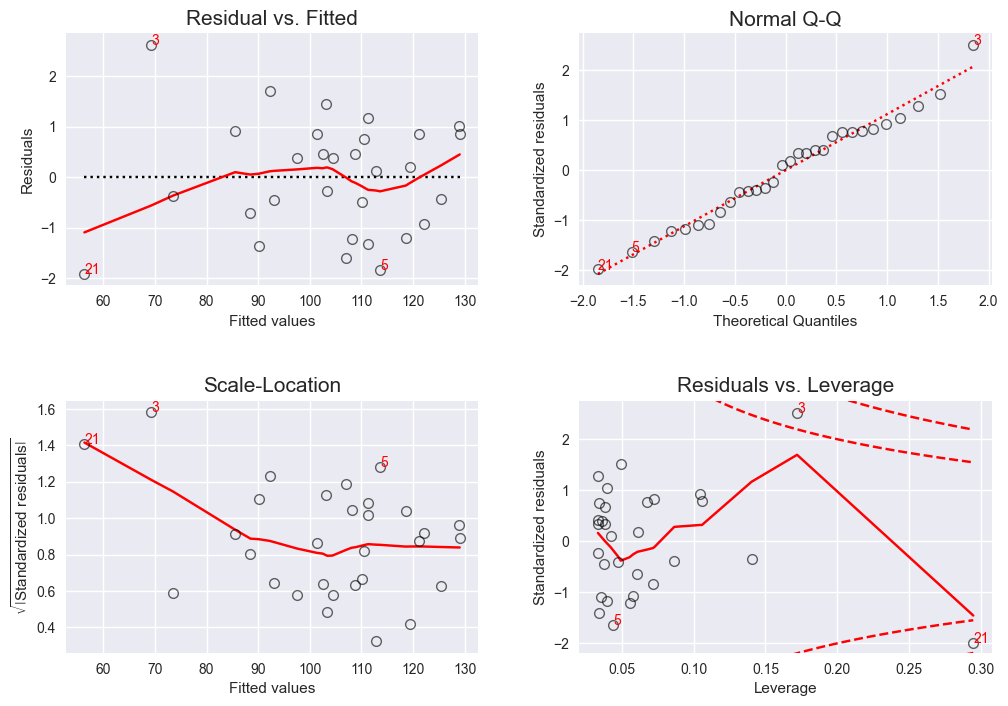

In [4]:
linearmodels_lm = IV2SLS(y, X, None, None).fit(cov_type="unadjusted")
lmdiag.plot(linearmodels_lm);

**Using `sklearn`:**

_Note:_ As sklearn's `LinearRegression` doesn't compute some of statistics required by `lmdiag`, you need to additionally pass the **training data used to fit the model**, so the missing statistics can be computed by internally.

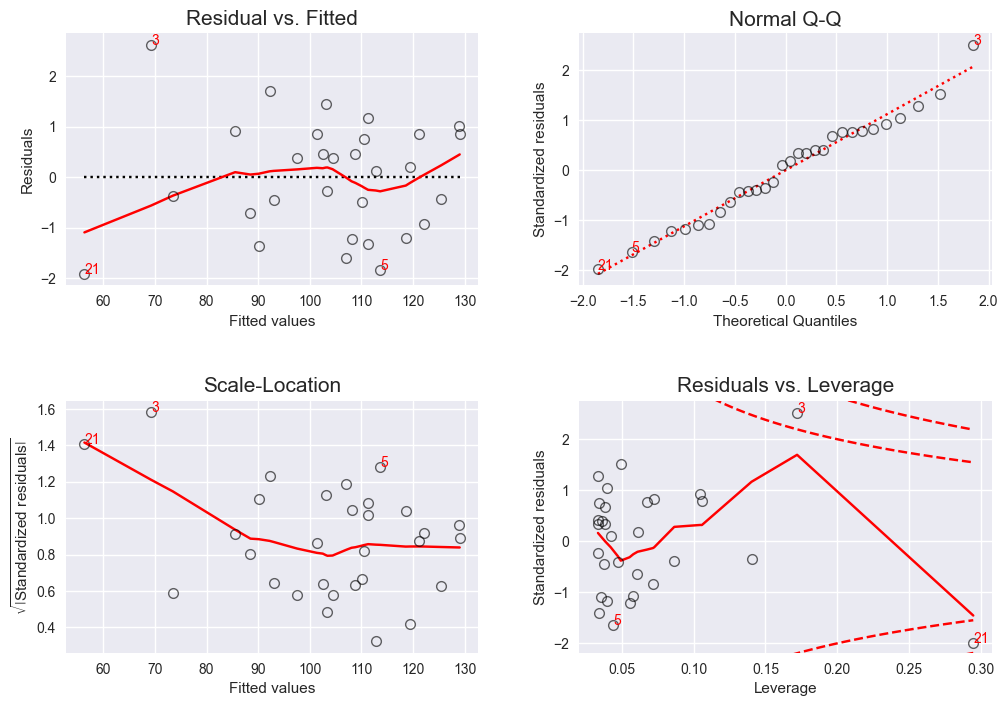

In [5]:
X_plain = X[:,1:]  # remove the intercept column which sklearn does not use
sklearn_lm = LinearRegression().fit(X_plain, y)
lmdiag.plot(sklearn_lm, x=X_plain, y=y);

### Plot the charts individually

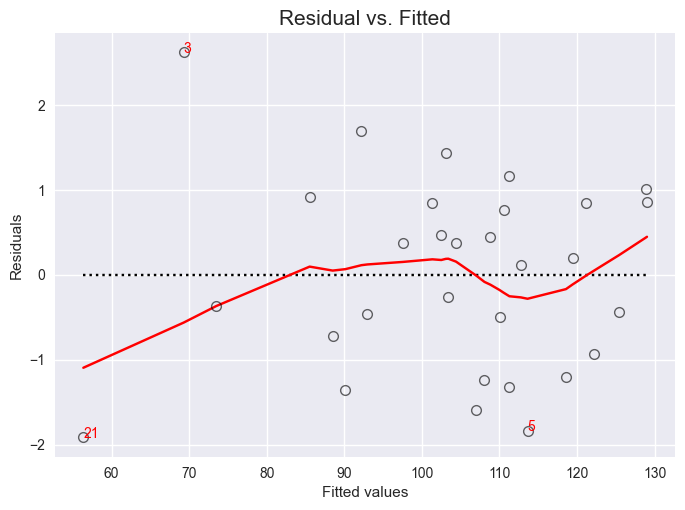

In [6]:
lmdiag.resid_fit(statsmodels_lm);

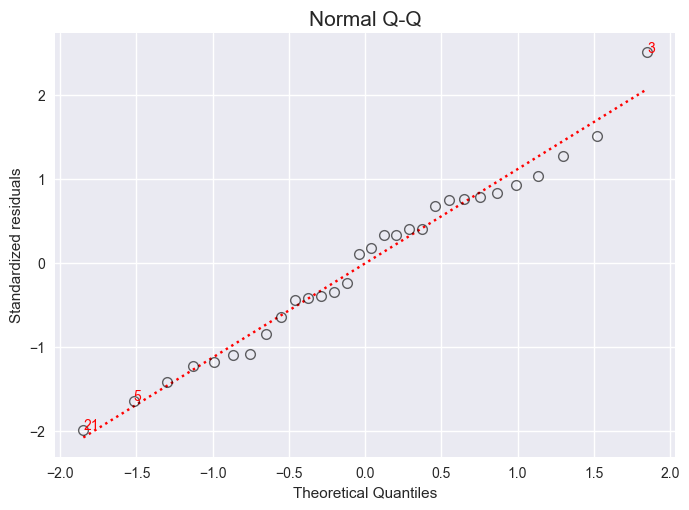

In [7]:
lmdiag.q_q(statsmodels_lm);

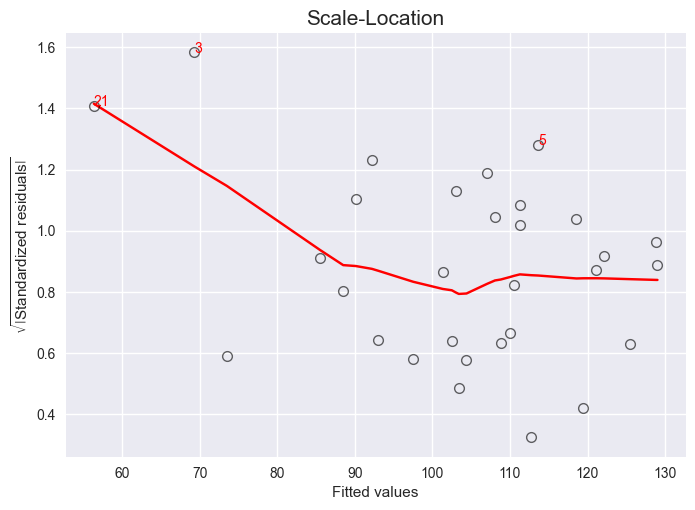

In [8]:
lmdiag.scale_loc(statsmodels_lm);

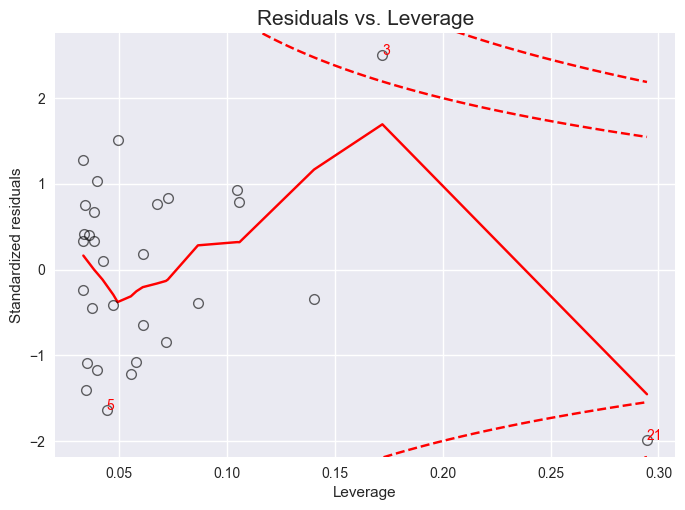

In [9]:
lmdiag.resid_lev(statsmodels_lm);

### Adjust plot appearance

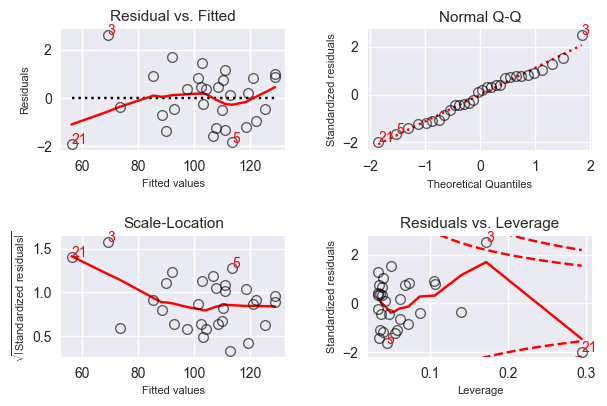

In [10]:
fig = lmdiag.plot(statsmodels_lm)

# Resize
fig.set_size_inches(6, 4)

# Adjust plot titles and axes labels
for ax in fig.axes:
    ax.set_title(label=ax.get_title(), fontsize=11)
    ax.set_xlabel(xlabel=ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ylabel=ax.get_ylabel(), fontsize=8)

# Adjust paddings
fig.tight_layout(pad=0.5, w_pad=3, h_pad=2)

### Print useful descriptions for interpretation

**For all available charts:**

In [11]:
lmdiag.info()

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (Predicted y-hat from training data. If a link
              function exists, its inverse is applied)

      y-Axis: Residuals (The 'error' of the model; Distances of the y-hat
              values to the fitted regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q

      Method: lmdiag.q_q(lm)

      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)

      y-Axis: Standardized

**Or for individual chart:**

In [12]:
lmdiag.info("resid_fit")

# Some with other charts:
# lmdiag.info('q_q')
# lmdiag.info('scale_loc')
# lmdiag.info('resid_lev')

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (Predicted y-hat from training data. If a link
              function exists, its inverse is applied)

      y-Axis: Residuals (The 'error' of the model; Distances of the y-hat
              values to the fitted regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

